### Лабораторная работа по модулю “Построение моделей”

В данной работе предлагается решить задачу мультиклассовойклассификации для датасетафлагов различных стран (https://archive.ics.uci.edu/ml/datasets/Flags)

1. Загрузить данные из папки Data Folder
2. Провести описательный анализ предложенных данных
3. Предложить стратегию по работе с категориальными переменными 
4. Провести углубленный анализ данных (корреляции переменных,визуализация взаимосвязей)
5. Следует ли увеличивать/уменьшать размерность признакового множества (какой подход выдает лучшие результаты)
6. Следует ли балансировать классы путем oversampling/undersampling? (улучшает ли подход результаты)
7. Сделать кросс-валидациюданных с использованием подхода K-fold (n_folds=3)
8. Решить задачу мультиклассовойклассификации и предсказать религию страны(religion)по деталям ее флага 
9. РассчитатьFeature Importancesдля переменных модели
10. Проверить качество классификации с использованием следующих метрик: Accuracy, F1-Score, Precision, Recall
11. Построить Confusion Matrix для ваших результатов
12. Загрузить ipythonnotebook с результатами работы на githubрепозиторий

*Пункты,показавшиеся вам сложными,либо которые вы не знаете можно пропускать,но с пометкой в ноутбуке,что показалось сложным и непонятным в данном пункте для вас. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

### 1. Загружаем данные

In [2]:
# Нагуглил заголовки
col_names = ['country', 'landmass', 'zone', 'area', 'population', 'language', 'religion', 'bars', 'stripes', 'colours', 'red', 'green', 'blue', 'gold', 'white', 'black', 'orange', 'dominantcolour', 'circles', 'crosses', 'saltires', 'quarters', 'sunstars', 'crescent', 'traingle', 'icon', 'animate', 'text', 'topleftcolour', 'botrightcolor']
flags = pd.read_csv('/home/data/netology_ml/data/lab_ml/flag.data', names=col_names)

In [3]:
flags.head()

country  landmass  zone  area  population  language  religion  bars  \
0     Afghanistan         5     1   648          16        10         2     0   
1         Albania         3     1    29           3         6         6     0   
2         Algeria         4     1  2388          20         8         2     2   
3  American-Samoa         6     3     0           0         1         1     0   
4         Andorra         3     1     0           0         6         0     3   

   stripes  colours      ...        saltires  quarters  sunstars  crescent  \
0        3        5      ...               0         0         1         0   
1        0        3      ...               0         0         1         0   
2        0        3      ...               0         0         1         1   
3        0        5      ...               0         0         0         0   
4        0        3      ...               0         0         0         0   

   traingle  icon  animate text  topleftcolour  botrightcolor  
0         0     1        0    0          black          green  
1         0     0        1    0            red            red  
2         0     0        0    0          green          white  
3         1     1        1    0           blue            red  
4         0     0        0    0           blue            red  

[5 rows x 30 columns]

Фух. Данные собрали.

### 2. Описываем данные

1. name:	Name of the country concerned 
2. landmass:	1=N.America, 2=S.America, 3=Europe, 4=Africa, 4=Asia, 6=Oceania 
3. zone:	Geographic quadrant, based on Greenwich and the Equator; 1=NE, 2=SE, 3=SW, 4=NW 
4. area:	in thousands of square km 
5. population:	in round millions 
6. language: 1=English, 2=Spanish, 3=French, 4=German, 5=Slavic, 6=Other Indo-European, 7=Chinese, 8=Arabic, 9=Japanese/Turkish/Finnish/Magyar, 10=Others 
7. religion: 0=Catholic, 1=Other Christian, 2=Muslim, 3=Buddhist, 4=Hindu, 5=Ethnic, 6=Marxist, 7=Others 
8. bars: Number of vertical bars in the flag 
9. stripes: Number of horizontal stripes in the flag 
10. colours: Number of different colours in the flag 
11. red: 0 if red absent, 1 if red present in the flag 
12. green: same for green 
13. blue: same for blue 
14. gold: same for gold (also yellow) 
15. white: same for white 
16. black: same for black 
17. orange: same for orange (also brown) 
18. mainhue: predominant colour in the flag (tie-breaks decided by taking the topmost hue, if that fails then the most central hue, and if that fails the leftmost hue) 
19. circles: Number of circles in the flag 
20. crosses: Number of (upright) crosses 
21. saltires: Number of diagonal crosses 
22. quarters: Number of quartered sections 
23. sunstars: Number of sun or star symbols 
24. crescent: 1 if a crescent moon symbol present, else 0 
25. triangle: 1 if any triangles present, 0 otherwise 
26. icon: 1 if an inanimate image present (e.g., a boat), otherwise 0 
27. animate: 1 if an animate image (e.g., an eagle, a tree, a human hand) present, 0 otherwise 
28. text: 1 if any letters or writing on the flag (e.g., a motto or slogan), 0 otherwise 
29. topleft: colour in the top-left corner (moving right to decide tie-breaks) 
30. botright: Colour in the bottom-left corner (moving left to decide tie-breaks)

In [4]:
flags.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194 entries, 0 to 193
Data columns (total 30 columns):
country           194 non-null object
landmass          194 non-null int64
zone              194 non-null int64
area              194 non-null int64
population        194 non-null int64
language          194 non-null int64
religion          194 non-null int64
bars              194 non-null int64
stripes           194 non-null int64
colours           194 non-null int64
red               194 non-null int64
green             194 non-null int64
blue              194 non-null int64
gold              194 non-null int64
white             194 non-null int64
black             194 non-null int64
orange            194 non-null int64
dominantcolour    194 non-null object
circles           194 non-null int64
crosses           194 non-null int64
saltires          194 non-null int64
quarters          194 non-null int64
sunstars          194 non-null int64
crescent          194 non-null int64
train

Прекрасно! Идеальный датасет без пропусков и всего 4 незакодированные категориальные переменные.

Целевая переменная у нас это religion. Скорее всего имеется ввиду преобладающая религия, т.к. у нас нет дубликатов.

### 3. Категориальные переменные
Тут все просто. Данных не много, я решил обучать случайный лес - применим one hot encoding.
Передварительно удалим название страны, т.к. название страны никак ~~скорее всего~~ не описывает ее флаг и религию.

In [5]:
flags = pd.get_dummies(flags.drop(columns=['country']))

### 4. Углубленно изучим данные

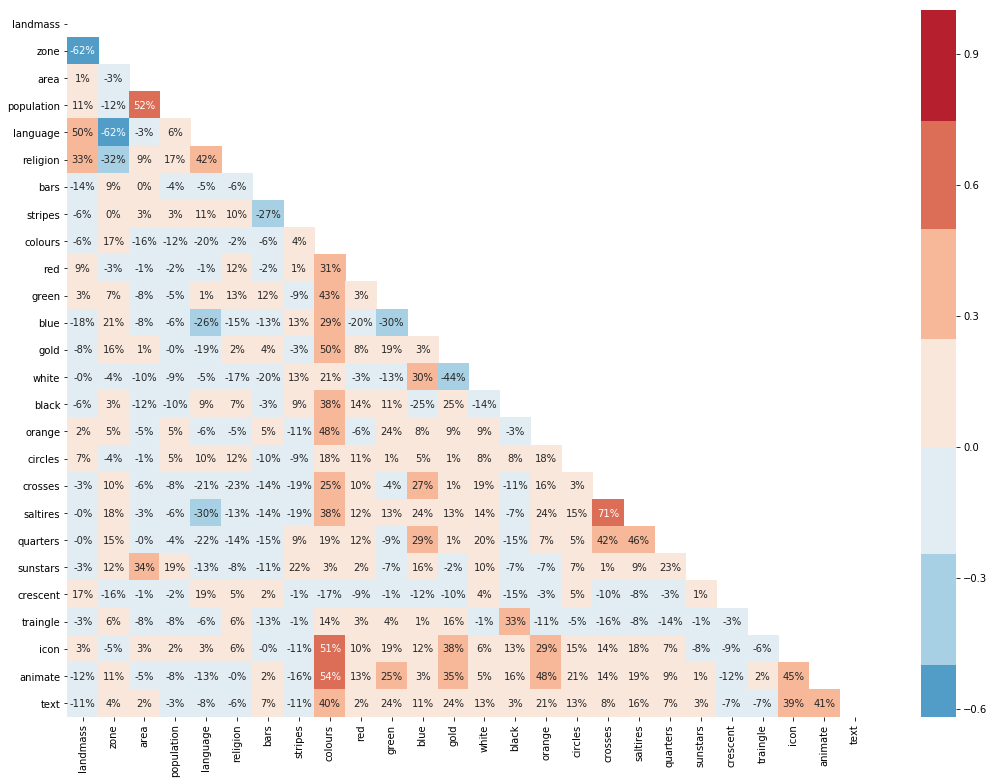

In [6]:
fig, ax = plt.subplots(figsize=(18, 13))
corr_normal = flags.corr()[flags.columns[:26]][:26]
mask = np.zeros_like(corr_normal)
mask[np.triu_indices_from(mask)] = True
ax = sns.heatmap(corr_normal, annot=True, fmt='.0%', mask=mask, cmap=sns.color_palette("RdBu_r", 8), center=0)

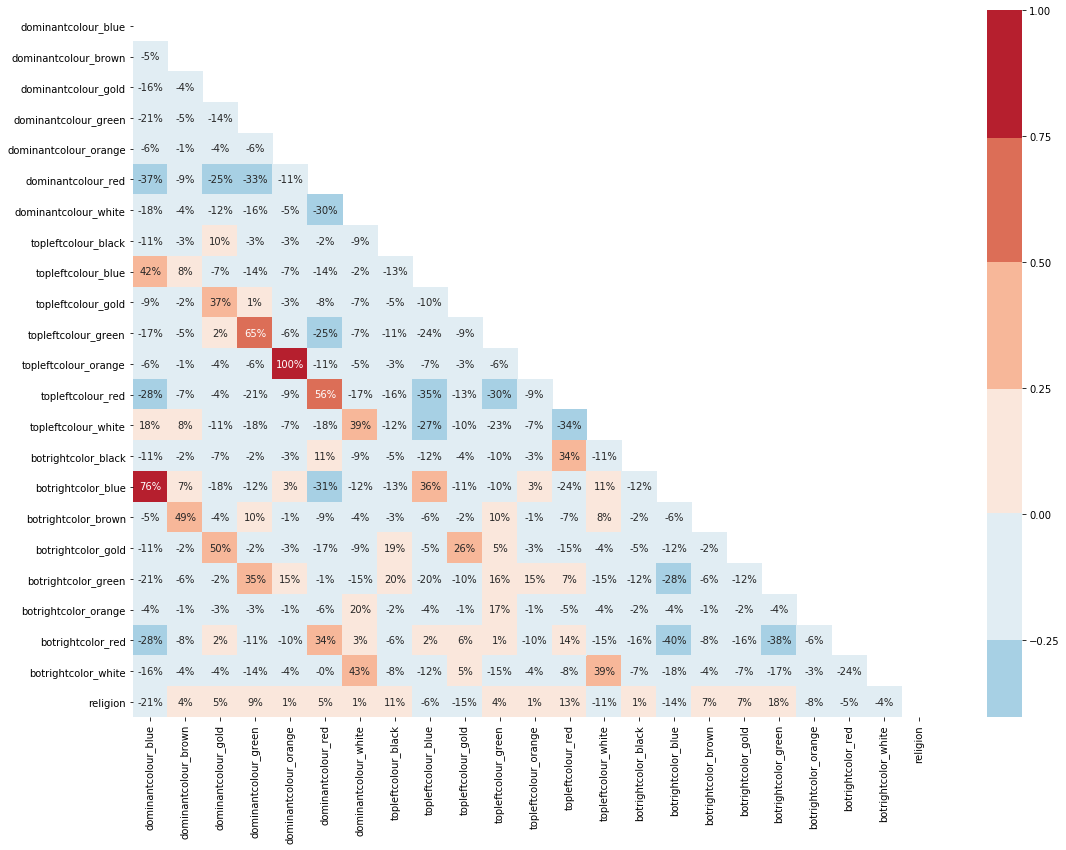

In [7]:
fig, ax = plt.subplots(figsize=(18, 13))
cor_data = flags[flags.columns[27:]][27:]
cor_data ['religion'] = flags.religion
corr_dummies = cor_data.corr()
mask = np.zeros_like(corr_dummies)
mask[np.triu_indices_from(mask)] = True
ax = sns.heatmap(corr_dummies, annot=True, fmt='.0%', mask=mask, cmap=sns.color_palette("RdBu_r", 8), center=0)

Посмотрим топ-20 сильнейших взамосвязий взятых по модулю

In [8]:
corr_normal.abs().sort_values(by='religion', ascending=False).religion[1:11]

language      0.422315
landmass      0.325073
zone          0.320537
crosses       0.225238
population    0.172731
white         0.167605
blue          0.154891
quarters      0.135713
saltires      0.133373
green         0.128843
Name: religion, dtype: float64

In [9]:
corr_dummies.abs().sort_values(by='religion', ascending=False).religion[1:11]

dominantcolour_blue     0.206253
botrightcolor_green     0.178608
topleftcolour_gold      0.147403
botrightcolor_blue      0.135075
topleftcolour_red       0.126367
topleftcolour_black     0.111622
topleftcolour_white     0.111417
dominantcolour_green    0.091199
botrightcolor_orange    0.084194
botrightcolor_gold      0.067382
Name: religion, dtype: float64

Конечно, странно смотреть на корреляцию категориальной переменной с другими, но вот что удалось обнаружить:
1. Язык довольно неплохо коррелирует с религией.
2. Площадь страны и её географическое распложение, численность населения - тоже интуитивно
3. А вот наличие на флаге крестов, и прочих атрибутов а также корреляции с цветами и их расположением - это уже интересно.

### 5. Размерность
У нас не такой большой датасет и достаточно вычислительных мощностей, поэтому снижать размерность не будем.
На практике, это бы следовало сделать, если бы у нас было значительно больше фичей. В этом случае неплохо себя показывает PCA. С помощью анализа главных компонент можно легко отранжировать признаки по тому какую часть дисперсии данных они описывают. Поставить точку отсечения и тем самым снизить вычислительную нагрузку при минимальной потери в данных.

### 6. Oversampling / undersampling
Для ответа на этот вопрос нужно посмотреть как распределены религии в датасете.

In [10]:
religions = {0:'Catholic', 1:'Other Christian', 2:'Muslim', 3:'Buddhist', 4:'Hindu', 5:'Ethnic', 6:'Marxist', 7:'Others'}

In [11]:
rel_count = flags.groupby(by='religion').size().reset_index(name='counts')
rel_count.religion = rel_count.religion.map(religions)

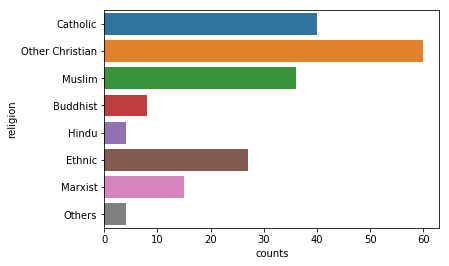

In [12]:
sns.barplot(x='counts', y='religion', data=rel_count)

Не все так плохо. Конечно, датасет несовершенен, так как в нем кажой стране присвоена преобладающая религия - это не совсем честно.

Многие классфикаторы скорее всего будут слабо чувствительны к классам, обучающих данных по которым недостаточно.
В нашем случае мало данных по Буддистам и Хинди. Их неплохо было бы включить в класс Other. Но мы делать этого не будем.

### 7. Делаем кросс-валидацию данных с использованием подхода K-fold (n_folds=3)
В качестве модели решил выбрать случайный лес.

In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.cross_validation import cross_val_score

/home/data/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d
/home/data/anaconda3/lib/python3.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [14]:
X = flags.drop(columns=['religion'])
y = flags.religion

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

In [16]:
forest = RandomForestClassifier(random_state=42)

In [17]:
scores = cross_val_score(forest, X, y, cv=3, scoring='accuracy', n_jobs=-1)
print('Mean accuracy for 3-folds: ', scores.mean())

Mean accuracy for 3-folds:  0.6345356550580431


### 8. Обучим лес.
Применим grid search

In [18]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

In [19]:
grid = {'max_depth': np.arange(5, 11),
        'max_leaf_nodes': np.arange(10, 35)
        }

gridsearch = GridSearchCV(forest, grid, scoring='accuracy', cv=3, n_jobs=-1)

In [20]:
gridsearch.fit(X_train, y_train)
gridsearch.best_estimator_

/home/data/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:605: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=14,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [21]:
forest = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=8, max_features='auto', max_leaf_nodes=20,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [22]:
forest.fit(X_train, y_train)
print('Train accuracy score: \t', accuracy_score(y_train, forest.predict(X_train)))
print('Test accuracy score: \t', accuracy_score(y_test, forest.predict(X_test)))
print('--------------------------------------------------\n')

Train accuracy score: 	 0.9278350515463918
Test accuracy score: 	 0.6391752577319587
--------------------------------------------------



Плохо. Лес не оправдал ожиданий. Налицо довольно сильное переобучение.

### 9. Важность переменных

In [23]:
feature_importances = pd.DataFrame(X_train.columns.tolist(), columns=['features'])
feature_importances['importance'] = forest.feature_importances_

In [24]:
feature_importances.sort_values(by='importance', ascending=False).head(10)

features  importance
0     landmass    0.144451
4     language    0.126872
2         area    0.099745
1         zone    0.081746
7      colours    0.058806
3   population    0.050040
5         bars    0.034832
16     crosses    0.034225
9        green    0.033074
6      stripes    0.031454

Интересно, что цветность флага и наличие на нем каких-либо сиволов или крестов довольно - это важно

### 10. Посмотрим на все метрики качества модели
т.к. у нас мультиклассовая классификация, выводить для f1, precision и recall будем взвешенные значения

In [25]:
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [26]:
print('Train accuracy score: \t', accuracy_score(y_train, forest.predict(X_train)))
print('Test accuracy score: \t', accuracy_score(y_test, forest.predict(X_test)))
print('--------------------------------------------------\n')
print('Train f1 score: \t', f1_score(y_train, forest.predict(X_train), average='weighted'))
print('Test f1 score: \t\t', f1_score(y_test, forest.predict(X_test), average='weighted'))
print('--------------------------------------------------\n')
print('Train precision score: \t', precision_score(y_train, forest.predict(X_train), average='weighted'))
print('Test precision score: \t', precision_score(y_test, forest.predict(X_test), average='weighted'))
print('--------------------------------------------------\n')
print('Train recall score: \t', recall_score(y_train, forest.predict(X_train), average='weighted'))
print('Test recall score: \t', recall_score(y_test, forest.predict(X_test), average='weighted'))
print('--------------------------------------------------\n')

Train accuracy score: 	 0.9278350515463918
Test accuracy score: 	 0.6391752577319587
--------------------------------------------------

Train f1 score: 	 0.9259170125407238
Test f1 score: 		 0.6112164788805473
--------------------------------------------------

Train precision score: 	 0.9360772076733684
Test precision score: 	 0.6038479088680793
--------------------------------------------------

Train recall score: 	 0.9278350515463918
Test recall score: 	 0.6391752577319587
--------------------------------------------------



/home/data/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/data/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


### 11. Строим confusion matrix

In [27]:
from sklearn.metrics import confusion_matrix

In [28]:
y_pred = forest.predict(X_test)

0 Catholic
1 Other Christian
2 Muslim
3 Buddhist
4 Hindu
5 Ethnic
6 Marxist
7 Others


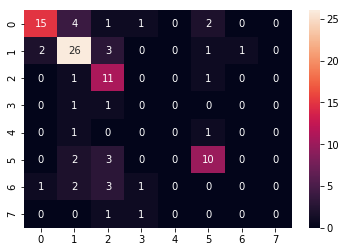

In [29]:
for key, value in religions.items():
    print(key, value)
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)

### 12. Готово.